# Övningsprov

## Uppgift 1

[Text(0.5, 1.0, 'Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

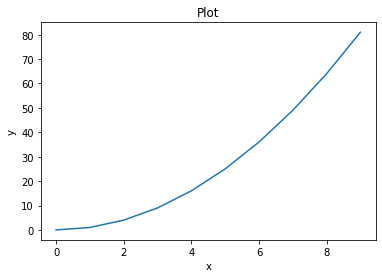

In [1]:
import matplotlib.pyplot as plt  #Import the package matplotlib.pyplot, which is used for plotting. Import it as plt, so that we do not have to use the full name when we write the code.

x = list(range(10)) #Creates a list of 10 numbers, between 0 and 9, and stores them in variable x.
y = [i**2 for i in x] #For each number in the list x, raise the number to the power of 2 and store it in a list y.
fig, ax = plt.figure(), plt.axes() #plt.figure() creates the figure/background for plotting the values (it is the top level container for all the plot elements). plt.axes() creates the axes for the figure. We can later use ax.plot(), instead of plt.plot(). This is the OOP approach to matplotlib.
ax.plot(x,y) #Creates the plot and plots the x values on the x-axis and the y-values on the y-axis. x will have the values 0-9 and y will have the squared values of x: 0, 1, 4, 9, 16, 25, 36, 49, 64, 81. The values will be connected with a line.
ax.set(title="Plot", xlabel="x", ylabel="y") #Sets the title to “Plot” and the xlabel and ylabel to “x” and “y” respectively. The title will be shown on the top of the plot and the y-value to the left of the y-axis and the x-label below the x-axis.

## Uppgift 2

In [2]:
#Version 1

import random as rnd
dice_rolls_counted = {"ones":0, "twos":0, "threes":0, "fours":0, "fives":0, "sixes":0}

for roll in range(1000000):
	result = rnd.randint(1, 6)

	if result == 1:
		dice_rolls_counted["ones"] += 1
	if result == 2:
		dice_rolls_counted["twos"] += 1
	if result == 3:
		dice_rolls_counted["threes"] += 1
	if result == 4:
		dice_rolls_counted["fours"] += 1
	if result == 5:
		dice_rolls_counted["fives"] += 1
	if result == 6:
		dice_rolls_counted["sixes"] += 1

print(dice_rolls_counted)

{'ones': 166516, 'twos': 166766, 'threes': 166323, 'fours': 166818, 'fives': 167165, 'sixes': 166412}


In [3]:
#Version 2

import random as rnd
dice_rolls_counted = {"1":0, "2":0, "3":0, "4":0, "5":0, "6":0}

for roll in range(1000000):
    result = rnd.randint(1, 6)
    dice_rolls_counted[str(result)] += 1

print(dice_rolls_counted)

{'1': 166700, '2': 167480, '3': 166320, '4': 166377, '5': 165978, '6': 167145}


## Uppgift 3

In [4]:
import math

def volume_sphere(radius:float) -> float:
	"""
	Calculates the volume of a sphere.

	Parameters
	----------
	radius:float
		The radius of a sphere.

	Raises
	------
	TypeError
		If the value for the radius is not an int or a float.
	ValueError
		If the radius is 0 or below

	Returns
	-------
	The volume of the sphere.
	"""

	if not isinstance(radius, (int, float)):
		raise TypeError(f"The value has to be an int or a float, not {type(radius)}.")
	if radius <= 0 :
		raise ValueError("The value has to be above 0.")
	return (4*math.pi*(radius**3))/3

try: 
	radius = input("Please enter the radius of the sphere.")

	if not radius.strip("-").isnumeric(): #If we do not use strip "-", negative values will not be recognised as numerical.
		raise TypeError("The value has to be numerical.")

	radius = float(radius)

	if radius <= 0 :
			raise ValueError("The value has to be above 0.")

	print(f"The volume of the sphere is: {volume_sphere(radius):.1f}.")

except (ValueError, TypeError) as err: #Both ValueError and TypeError has to be part of the except. Otherwise the program crashes.
	print(err)

The volume of the sphere is: 904.8.


## Uppgift 4

In [5]:
with open ("bamba.txt", "r") as b:
    bamba = b.read()

print(bamba)

v42
Chili sin carne
Pannkakor
Ärtsoppa
Kebab
Vegetarisk lasagne


## Uppgift 5

In [6]:
from math import sqrt

path = "testpoints/testpunkter.txt"
with open (path, "r") as t:
    test = [line.strip("\n") for line in t.readlines()] #Reads each line, strips it from "\n" and saves each line in the list test.
    test.pop(0) #Removes the heading
    test = [line.split(" ") for line in test] #Split the elements on empty space, so that we create inner lists, consisting of two points
    test = [[line[0].replace("(", "").replace(")", ""), line[1].replace("(", "").replace(")", "")] for line in test] #Removes all paranthesis for each item in the inner lists
    test = [[line[0].split(","), line[1].split(",")] for line in test] #Splits the items in the inner lists into two lists, where each list contains an x and y value 
    test = [[(int(line[0][0]), int(line[0][1])), (int(line[1][0]), int(line[1][1]))] for line in test] #Changes the x and y values in the inner-inner lists and stores them as tuples (x, y)

def eucl_dist(point1:tuple, point2:tuple) -> float:
    """
    Calculates the euclidean distance between two points.

    Parameters
        ---------------
    point1 : tuple
    The first point (x, y) for comparison.
    point2 : tuple
    The second point (x, y) for comparison.

    Returns
    -----------
    The euclidean distance between point 1 and 2.
    """
    
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

for point in test:
    print(f"The euclidean distance between {point[0]}, {point[1]} is: {eucl_dist(point[0], point[1]):.1f}.")

The euclidean distance between (1, 2), (0, 0) is: 2.2.
The euclidean distance between (2, 0), (3, 5) is: 5.1.
The euclidean distance between (-2, -2), (9, 2) is: 11.7.


## Uppgift 6

In [24]:
import random as rnd #Imports the random package as rnd

#Creates a list of lists, where the first number in the list symbolises the card number (between 2 and 14, where 11=Jack, 12=Queen, 13=King and 14=Ace) and the second number symbolises the count of the card (initialised to 4). This is the full deck.
deck = [[card_number, 4] for card_number in range(2, 15)]

#Creates a list of lists to store the player’s cards (the second element in the inner lists is the number of cards of that type that the player has picked).
players_cards = [[card_number, 0] for card_number in range(2, 15)]

#Sets the count of the card values for the dealer
dealers_card_count = 0

#DEALER DRAWS TWO CARDS

for draw in range(2):

    card_number = rnd.randint(2, 14) #Generates a random number between 2 and 14

    if card_number == 11 or card_number == 12 or card_number == 13:
	    dealers_card_count += 10 #Jack, queen and king gives 10 points
    elif card_number == 14:
	    dealers_card_count += 11 #Ace gives 11 points
    else:
	    dealers_card_count += card_number #The other numbers give their value
	
    if draw == 0: #In the first round, the players sees the dealer’s card	
        if card_number == 11:
            print("The dealer got a Jack, as the first card.")
        elif card_number == 12:
            print("The dealer got a Queen, as the first card.")
        elif card_number == 13:
            print("The dealer got a King, as the first card.")
        elif card_number == 14:
            print("The dealer got an Ace, as the first card.")
        else:
            print(f"The dealer got a {card_number}, as the first card.")
		
    deck[card_number-2][1] -= 1 #Removes one from the count of the card number

#PLAYER DRAWS TWO CARDS

for draw in range(2):
    card_number = rnd.randint(2, 14) #Generates a random number, between 2 and 14

    while deck[card_number-2][1] == 0: #If the card number is no longer available in the deck, generate a new random number.
        card_number = rnd.randint(2, 14)
    
    if card_number == 11:
        print("You got a Jack.")
    elif card_number == 12:
        print("You got a Queen.")
    elif card_number == 13:
        print("You got a King.")
    elif card_number == 14:
        print("You got an Ace.")
    else:
        print(f"You got a {card_number}.")

    deck[card_number-2][1] -= 1 #Removes one from the count of the card number
    players_cards[card_number-2][1] += 1 #Adds one to the count of the player’s cards for that number.

#PLAYER CONTINUES TO DRAW CARDS

while(True):
    continue_ = input("Type 'yes' if you want to draw another card. To finish and count your cards, type 'no'.")
    if continue_ == "yes":
        card_number = rnd.randint(2, 14)
        while deck[card_number-2][1] == 0:
            card_number = rnd.randint(2, 14)
        
        if card_number == 11:
            print("You got a Jack.")
        elif card_number == 12:
            print("You got a Queen.")
        elif card_number == 13:
            print("You got a King.")
        elif card_number == 14:
            print("You got an Ace.")
        else:
            print(f"You got a {card_number}.")
        
        deck[card_number-2][1] -= 1
        players_cards[card_number-2][1] += 1

    else:
	    break

#COUNT PLAYERS CARD

players_card_count = 0

for card_number in players_cards:
    if card_number[0] == 11 or card_number[0] == 12 or card_number[0] == 13:
        players_card_count += (card_number[1] * 10)
    elif card_number[0] == 14: #This is last in the list and will be run last
        if (players_card_count + card_number[1]*11) <= 21:
            players_card_count += (card_number[1] * 11)
        else:
            players_card_count += (card_number[1] * 1)
    else:
        players_card_count += (card_number[0] * card_number[1])

#RESULTS

if (players_card_count <= 21 and players_card_count > dealers_card_count):
    print("Congratulations! You won!")
else:
    print("You lost!")

The dealer got a 5, as the first card.
You got an Ace.
You got a 10.
You got a 10.
Congratulations! You won!


## Uppgift 7

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

class NormalDist:
    def __init__(self, mu:float, sigma:float) -> None:
        self.mu = mu
        self.sigma = sigma
        
    @property
    def mu(self):
        return self._mu
    
    @property
    def sigma(self):
        return self._sigma
    
    @mu.setter
    def mu(self, mu):
	    self._mu = NormalDist.is_numerical(mu)
    
    @sigma.setter
    def sigma(self, sigma):
        self._sigma = NormalDist.is_numerical(sigma)
    
    @staticmethod
    def is_numerical(value):
        if not isinstance(value, (int, float)):
            raise ValueError("The value has to be numerical.")
        return value
        
    def pdf(self, x:float) -> float:
        formula_part1 = 1/(self.sigma*(math.sqrt(2*math.pi)))
        formula_part2 = math.e**(-1/2*((x-self.mu)/self.sigma)**2)
        return float(formula_part1*formula_part2)

    def plot_pdf(self, x:float) -> None:
        fig = plt.figure(dpi=100)
        ax = plt.axes()
        
        x_values = np.arange(-self.sigma*3, self.sigma*3, .001) #Creates a list of x_values between -3 SD and 3 SD, with a step of .001
        f_values = [self.pdf(x) for x in x_values] #Run the pdf-function on all the x-values and store them in f_values
        ax.plot(x_values, f_values) #Plots the values
        ax.scatter(x, self.pdf(x)) #Plots the x-point.
        ax.set(title="Normal Distribution", xlabel="x", ylabel="y")
        plt.show()
		
    def __add__(self, other) -> "NormalDist":
        normal_dist_added = NormalDist((self.mu+other.mu), (self.sigma+other.sigma))
        return normal_dist_added
    
    def __repr__(self):
        return f"A normal distribution with mu={self.mu}, sigma={self.sigma}."

A normal distribution with mu=-2, sigma=8.
0.041020121068796885


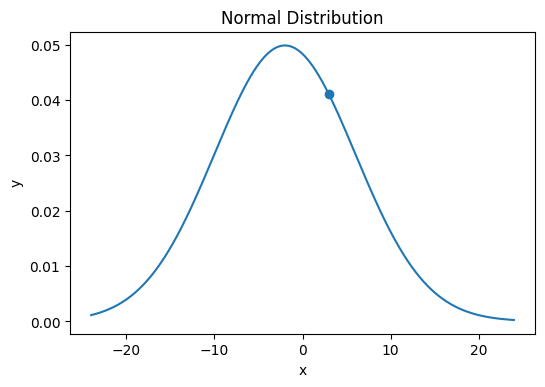

In [25]:
n_dist1 = NormalDist(0, 3)
n_dist2 = NormalDist(-2, 5)

n_dist3 = n_dist1 + n_dist2
print(n_dist3)
print(n_dist3.pdf(3))
n_dist3.plot_pdf(3)